In [77]:
import requests
import random
import math
import matplotlib.pyplot as plt

# Exercise 1

In [3]:
r = requests.get("https://raw.githubusercontent.com/Micniks/Python-Week10-Group-3-Assignments/main/Random_Names.txt")
open('RandomNames.txt', 'wb').write(r.content)

1373

In [19]:
def recruit_cultist(name):
    min_score = 0
    max_score = 5
    cultist = {
      'name': name,
        'skills': {
        'stealth': random.randint(min_score, max_score), 
        'influence': random.randint(min_score, max_score), 
        'endurance': random.randint(min_score, max_score), 
        'lore': random.randint(min_score, max_score), 
        'economic': random.randint(min_score, max_score), 
        'strength': random.randint(min_score, max_score), 
        'insanity': random.randint(min_score, max_score)
      }
    }
    return cultist

c = recruit_cultist("Peter")
c

{'name': 'Peter',
 'skills': {'stealth': 1,
  'influence': 1,
  'endurance': 4,
  'lore': 3,
  'economic': 3,
  'strength': 5,
  'insanity': 0}}

In [20]:
with open('RandomNames.txt','r') as file:
    lines = [line.replace("\n","") for line in file]
    cult = [recruit_cultist(line) for line in lines]

In [71]:
cult_roles = {
    'Priest': {'stealth': -1, 'influence': 3, 'endurance': 2, 'lore': 4, 'economic': 1, 'strength': 0, 'insanity': 5},
    'Enforcer': {'stealth': 1, 'influence': 3, 'endurance': 4, 'lore': 0, 'economic': -1, 'strength': 5, 'insanity': 2},
    'Assassin': {'stealth': 5, 'influence': -1, 'endurance': 4, 'lore': 1, 'economic': 0, 'strength': 2, 'insanity': 3},
    'Recruiter': {'stealth': 1, 'influence': 5, 'endurance': 0, 'lore': 3, 'economic': 2, 'strength': -1, 'insanity': 4},
    'Accountant': {'stealth': 2, 'influence': 1, 'endurance': 3, 'lore': 4, 'economic': 5, 'strength': 0, 'insanity': -1},
    'Advisor': {'stealth': 2, 'influence': 4, 'endurance': -1, 'lore': 5, 'economic': 3, 'strength': 0, 'insanity': 1},
    'Brute': {'stealth': -1, 'influence': 1, 'endurance': 5, 'lore': -1, 'economic': 3, 'strength': 0, 'insanity': 1}
}

In [73]:
def assign_cult_role(cultists, cult_roles):
    all_cultists_roles = {}
    for cultist in cultists:
        cultist_name = cultist['name']
        cultist_role = ""
        bestSkill = max(cultist['skills'],key=cultist['skills'].get)
        for role in cult_roles:
            bestRoleSkill = max(cult_roles[role], key=cult_roles[role].get)
            if bestRoleSkill is bestSkill:
                all_cultist_roles[cultist_name] = role
                break;
    return all_cultist_roles

{'Johnathon Compton': 'Brute',
 'Wilma Hudson': 'Assassin',
 'Mary Harrington': 'Assassin',
 'Thelma Blanchard': 'Assassin',
 'Lindsey Mcgee': 'Enforcer',
 'Harlan Ewing': 'Advisor',
 'Cara Giles': 'Advisor',
 'Roger Oliver': 'Brute',
 'Herminia Munoz': 'Assassin',
 'Fred Alvarez': 'Brute',
 'Bud Woods': 'Assassin',
 'Freida Case': 'Assassin',
 'Eldridge Hatfield': 'Brute',
 'Jan Cabrera': 'Advisor',
 'Jermaine Pratt': 'Advisor',
 'Lanny Huynh': 'Brute',
 'Ulysses Mccall': 'Recruiter',
 'Coleen Weber': 'Assassin',
 'Trudy Gaines': 'Brute',
 'Loyd Tapia': 'Assassin',
 'George Gordon': 'Assassin',
 'Nick Oconnor': 'Accountant',
 'Latoya Gilmore': 'Brute',
 'Eldon Pena': 'Recruiter',
 'Tania Roberson': 'Recruiter',
 'Allie Sanchez': 'Assassin',
 'Weston Chang': 'Priest',
 'Marci Salinas': 'Brute',
 'Tasha Allison': 'Assassin',
 'Jerri Carey': 'Assassin',
 'Virginia Harrison': 'Assassin',
 'April Hull': 'Accountant',
 'Lupe Eaton': 'Enforcer',
 'Inez Lozano': 'Advisor',
 'Forrest Santana':

Text(0.5, 1.0, 'Number of Cultists pr. Role')

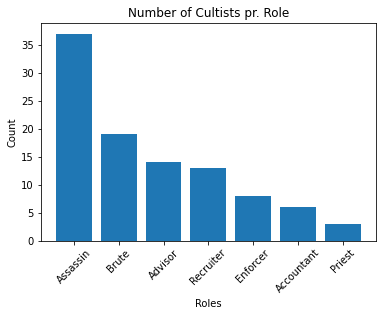

In [92]:
cultist_role = assign_cult_role(cult, cult_roles)
role_spread = {}
for key in cultist_role:
    role = cultist_role[key]
    if role in role_spread:
        cur_value = role_spread[role]
        cur_value += 1
        role_spread[role] = cur_value
    else:
        role_spread[role] = 1
sorted_spread = {key: value for key, value in sorted(role_spread.items(), key=lambda item: item[1], reverse=True)}
plt.bar(sorted_spread.keys(), sorted_spread.values(), align='center')
plt.xticks(rotation=45)
plt.xlabel('Roles')
plt.ylabel('Count')
plt.title('Number of Cultists pr. Role')


# Exercise 2

In [120]:
import pandas as pd
import sklearn.linear_model
import numpy as np

In [116]:
data = pd.read_csv('https://raw.githubusercontent.com/Micniks/Python-Week10-Group-3-Assignments/main/cult_statistics.csv')
data

,year,new_recruit,amount_spend(per_10000),total_amount
0,1605,9,0.09,344
1,1606,11,0.11,355
2,1607,11,0.11,366
3,1608,10,0.10,376
4,1609,12,0.11,388
...,...,...,...,...
411,2016,704,7.05,64063
412,2017,601,6.14,64664
413,2018,677,7.06,65341
414,2019,659,6.73,66000


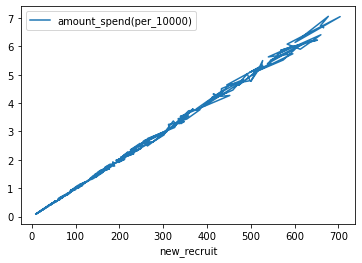

In [113]:
new_r = data.set_index(data["new_recruit"])[["amount_spend(per_10000)"]]
new_r.plot()

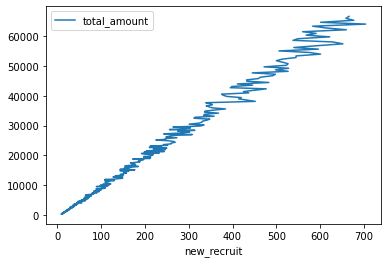

In [114]:
new_r_2 = data.set_index(data["new_recruit"])[["total_amount"]]
new_r_2.plot()

In [126]:
xs = data["total_amount"]
ys = data["new_recruit"]
xs_reshape = np.array(xs).reshape(-1,1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)
predicted = model.predict(xs_reshape)
spending10000 = model.predict([[120000]])
print('Spending 120000 on new recruits means there will join {} new recruits'.format(spending10000[0]))
predicted

Spending 120000 on new recruits means there will join 1197.952107101638 new recruits


array([ 11.13941947,  11.2485234 ,  11.35762733,  11.45681272,
        11.57583518,  11.69485765,  11.80396158,  11.90314697,
        12.01225089,  12.11143628,  12.22054021,  12.33956268,
        12.46850368,  12.56768907,  12.676793  ,  12.79581547,
        12.90491939,  13.0338604 ,  13.1628014 ,  13.27190533,
        13.3909278 ,  13.5198688 ,  13.63889127,  13.75791374,
        13.89677328,  14.03563283,  14.16457383,  14.31335191,
        14.44229292,  14.56131539,  14.70017493,  14.83903447,
        14.98781256,  15.13659064,  15.28536872,  15.43414681,
        15.58292489,  15.73170297,  15.87056252,  16.0193406 ,
        16.16811868,  16.30697823,  16.46567485,  16.62437147,
        16.78306809,  16.93184618,  17.0905428 ,  17.23932088,
        17.40793604,  17.56663266,  17.72532929,  17.91378153,
        18.07247815,  18.26093039,  18.42954555,  18.60807925,
        18.78661295,  18.96514665,  19.13376181,  19.33213258,
        19.51066628,  19.70903706,  19.90740784,  20.10

In [127]:
xs = data["total_amount"]
ys = data["new_recruit"]
xs_reshape = np.array(xs).reshape(-1,1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)
model.coef_

predicted = model.predict(xs_reshape)
spending10000 = model.predict([[80000]])
print('Spending 20 % less on new recruits means only {} new recruits will join.'.format(spending10000[0]))
predicted

Spending 20 % less on new recruits means only 801.2105521012606 new recruits will join.


array([ 11.13941947,  11.2485234 ,  11.35762733,  11.45681272,
        11.57583518,  11.69485765,  11.80396158,  11.90314697,
        12.01225089,  12.11143628,  12.22054021,  12.33956268,
        12.46850368,  12.56768907,  12.676793  ,  12.79581547,
        12.90491939,  13.0338604 ,  13.1628014 ,  13.27190533,
        13.3909278 ,  13.5198688 ,  13.63889127,  13.75791374,
        13.89677328,  14.03563283,  14.16457383,  14.31335191,
        14.44229292,  14.56131539,  14.70017493,  14.83903447,
        14.98781256,  15.13659064,  15.28536872,  15.43414681,
        15.58292489,  15.73170297,  15.87056252,  16.0193406 ,
        16.16811868,  16.30697823,  16.46567485,  16.62437147,
        16.78306809,  16.93184618,  17.0905428 ,  17.23932088,
        17.40793604,  17.56663266,  17.72532929,  17.91378153,
        18.07247815,  18.26093039,  18.42954555,  18.60807925,
        18.78661295,  18.96514665,  19.13376181,  19.33213258,
        19.51066628,  19.70903706,  19.90740784,  20.10

In [130]:
xs = data["new_recruit"]
ys = data["total_amount"]
xs_reshape = np.array(xs).reshape(-1,1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)
model.coef_

predicted = model.predict(xs_reshape)
spending10000 = model.predict([[800]])
print('{} Will be needed to be spend on new recruits to have as many join as in 2020.'.format(spending10000[0]))
predicted

79371.06507706578 Will be needed to be spend on new recruits to have as many join as in 2020.


array([  247.35585011,   447.41579758,   447.41579758,   347.38582384,
         547.44577132,   547.44577132,   447.41579758,   347.38582384,
         447.41579758,   347.38582384,   447.41579758,   547.44577132,
         647.47574506,   347.38582384,   447.41579758,   547.44577132,
         447.41579758,   647.47574506,   647.47574506,   447.41579758,
         547.44577132,   647.47574506,   547.44577132,   547.44577132,
         747.5057188 ,   747.5057188 ,   647.47574506,   847.53569253,
         647.47574506,   547.44577132,   747.5057188 ,   747.5057188 ,
         847.53569253,   847.53569253,   847.53569253,   847.53569253,
         847.53569253,   847.53569253,   747.5057188 ,   847.53569253,
         847.53569253,   747.5057188 ,   947.56566627,   947.56566627,
         947.56566627,   847.53569253,   947.56566627,   847.53569253,
        1047.59564001,   947.56566627,   947.56566627,  1247.65558749,
         947.56566627,  1247.65558749,  1047.59564001,  1147.62561375,
      